In [108]:
from wordcloud import WordCloud, STOPWORDS

In [109]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%matplotlib inline
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd
import os
import re
import nltk

In [110]:
train=pd.read_csv('fake-news-data/train.csv')
test=pd.read_csv('fake-news-data/test.csv')  #import data

In [111]:
print(train.shape, test.shape)

(20800, 5) (5200, 4)


<AxesSubplot:>

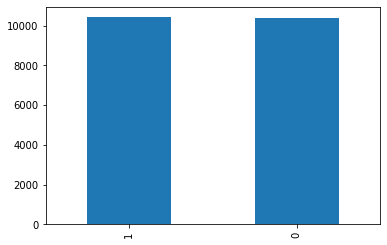

In [112]:
train['label'].value_counts().plot(kind = 'bar')

In [113]:
train['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [114]:
train['label'].describe()

count    20800.000000
mean         0.500625
std          0.500012
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: label, dtype: float64

In [115]:
train.head() #show the top 5 rows of train data

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [116]:
train['text'][1]

'Ever get the feeling your life circles the roundabout rather than heads in a straight line toward the intended destination? [Hillary Clinton remains the big woman on campus in leafy, liberal Wellesley, Massachusetts. Everywhere else votes her most likely to don her inauguration dress for the remainder of her days the way Miss Havisham forever wore that wedding dress.  Speaking of Great Expectations, Hillary Rodham overflowed with them 48 years ago when she first addressed a Wellesley graduating class. The president of the college informed those gathered in 1969 that the students needed “no debate so far as I could ascertain as to who their spokesman was to be” (kind of the like the Democratic primaries in 2016 minus the   terms unknown then even at a Seven Sisters school). “I am very glad that Miss Adams made it clear that what I am speaking for today is all of us —  the 400 of us,” Miss Rodham told her classmates. After appointing herself Edger Bergen to the Charlie McCarthys and Mor

In [117]:
train['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [118]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [119]:
print(train.isnull().sum()) #check the null values in train data
print("\n")
print(test.isnull().sum())  #check the null values in test data

id           0
title      558
author    1957
text        39
label        0
dtype: int64


id          0
title     122
author    503
text        7
dtype: int64


In [120]:
from collections import Counter
print(Counter(train['label'].values))

Counter({1: 10413, 0: 10387})


In [11]:
test=test.fillna(' ')
train=train.fillna(' ') #replace missing value with a space
test['total']=test['title']+' '+test['author']+test['text']
train['total']=train['title']+' '+train['author']+train['text'] #merge all columns in one

In [12]:
train.head()

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Varun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
from nltk.stem import WordNetLemmatizer

In [16]:
lemmatizer=WordNetLemmatizer()
for index,row in train.iterrows():
    filter_sentence = ''
    
    sentence = row['total']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    
    words = nltk.word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stop_words] #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower() #lemetization
        
    train.loc[index,'total'] = filter_sentence

In [17]:
train.head()

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide we didnt even see comeys lette...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,flynn hillary clinton big woman campus breitb...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,why truth might get you fired consortiumnewsc...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 civilians killed in single us airstrike ha...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,iranian woman jailed fictional unpublished st...


In [18]:
train['total'][0]

' house dem aide we didnt even see comeys letter until jason chaffetz tweeted it darrell lucushouse dem aide we didnt even see comeys letter until jason chaffetz tweeted it by darrell lucus october 30 2016 subscribe jason chaffetz stump american fork utah image courtesy michael jolley available creative commonsby license with apology keith olbermann doubt worst person the world weekfbi director james comey but according house democratic aide look like also know secondworst person well it turn comey sent nowinfamous letter announcing fbi looking email may related hillary clintons email server ranking democrats relevant committee didnt hear comey they found via tweet one republican committee chairman as know comey notified republican chairman democratic ranking member house intelligence judiciary oversight committee agency reviewing email recently discovered order see contained classified information not long letter went oversight committee chairman jason chaffetz set political world abl

In [19]:
train = train[['total','label']]

In [20]:
train.head()

,total,label
0,house dem aide we didnt even see comeys lette...,1
1,flynn hillary clinton big woman campus breitb...,0
2,why truth might get you fired consortiumnewsc...,1
3,15 civilians killed in single us airstrike ha...,1
4,iranian woman jailed fictional unpublished st...,1


In [21]:
train.tail()

,total,label
20795,rapper ti trump poster child for white suprem...,0
20796,nfl playoffs schedule matchups odds the new y...,0
20797,macys is said receive takeover approach hudso...,0
20798,nato russia to hold parallel exercises in bal...,1
20799,what keeps f35 alive david swanson david swan...,1


In [22]:
import torch.nn as nn

In [23]:
from pytorch_pretrained_bert import BertTokenizer, BertModel

In [24]:
import torch

In [25]:
from keras.preprocessing.sequence import pad_sequences

In [26]:
from sklearn.metrics import classification_report

In [27]:
from sklearn.feature_extraction.text import TfidfTransformer

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
from transformers import BertModel, BertConfig

In [32]:
git clone https://github.com/google-research/bert.git

In [33]:
X_train = train['total']
Y_train = train['label']

In [107]:
X_train.head()

AttributeError: head not found

In [34]:
def vectorize_text(features, max_features):
    vectorizer = TfidfVectorizer(stop_words='english',
                                decode_error='strict',
                                analyzer='word',
                                ngram_range=(1, 2),
                                max_features=max_features)
    feature_vec = vectorizer.fit_transform(features)
    return feature_vec.toarray()

In [35]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [36]:
tf_idf_matrix

<20800x220387 sparse matrix of type '<class 'numpy.float64'>'
	with 5987666 stored elements in Compressed Sparse Row format>

In [37]:
test_counts = count_vectorizer.transform(test['total'].values)
test_tfidf = tfidf.transform(test_counts)

#split in samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train,random_state=0)

In [38]:
print(X_train.shape,X_test.shape)

(15600, 220387) (5200, 220387)


In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5) #regularization to avoid over fitting
logreg.fit(X_train,y_train)
pred = logreg.predict(X_test)
print('Accuracy on Training Set: {:.2f}'.format(logreg.score(X_train,y_train)))
print('Accuracy on Test Set: {:.2f}'.format(logreg.score(X_test,y_test)))
from sklearn.naive_bayes import MultinomialNB
cm = confusion_matrix(y_test, pred)
cm

Accuracy on Training Set: 1.00
Accuracy on Test Set: 0.98


array([[2493,   71],
       [  44, 2592]], dtype=int64)

In [40]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train, y_train)
pred = NB.predict(X_test)
print('Accuracy on Training Set: {:.2f}'.format(logreg.score(X_train,y_train)))
print('Accuracy on Test Set: {:.2f}'.format(logreg.score(X_test,y_test)))
cm = confusion_matrix(y_test, pred)
cm

Accuracy on Training Set: 1.00
Accuracy on Test Set: 0.98


array([[2558,    6],
       [ 853, 1783]], dtype=int64)

In [92]:
from sklearn.pipeline import Pipeline
import joblib
from sklearn import linear_model

In [93]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [101]:
pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer(norm='l2')),
        ('clf', linear_model.LogisticRegression(C=1e5))
    ])

In [106]:
pipeline.fit(y_train)

AttributeError: 'int' object has no attribute 'lower'

In [46]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    plt.imshow(cn, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion Matrix, without normalization")
        
    thresh = cm.max() / 2
    for i, j in iter.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
                

In [58]:
from gensim.models import Word2Vec
from nltk.corpus import stopwords

In [59]:
import re

In [60]:
paragraph = """Ever get the feeling your life circles the roundabout rather than heads in a straight line toward the intended destination? [Hillary Clinton remains the big woman on campus in leafy, liberal Wellesley, Massachusetts. Everywhere else votes her most likely to don her inauguration dress for the remainder of her days the way Miss Havisham forever wore that wedding dress.  Speaking of Great Expectations, Hillary Rodham overflowed with them 48 years ago when she first addressed a Wellesley graduating class. The president of the college informed those gathered in 1969 that the students needed “no debate so far as I could ascertain as to who their spokesman was to be” (kind of the like the Democratic primaries in 2016 minus the   terms unknown then even at a Seven Sisters school). “I am very glad that Miss Adams made it clear that what I am speaking for today is all of us —  the 400 of us,” Miss Rodham told her classmates. After appointing herself Edger Bergen to the Charlie McCarthys and Mortimer Snerds in attendance, the    bespectacled in granny glasses (awarding her matronly wisdom —  or at least John Lennon wisdom) took issue with the previous speaker. Despite becoming the first   to win election to a seat in the U. S. Senate since Reconstruction, Edward Brooke came in for criticism for calling for “empathy” for the goals of protestors as he criticized tactics. Though Clinton in her senior thesis on Saul Alinsky lamented “Black Power demagogues” and “elitist arrogance and repressive intolerance” within the New Left, similar words coming out of a Republican necessitated a brief rebuttal. “Trust,” Rodham ironically observed in 1969, “this is one word that when I asked the class at our rehearsal what it was they wanted me to say for them, everyone came up to me and said ‘Talk about trust, talk about the lack of trust both for us and the way we feel about others. Talk about the trust bust.’ What can you say about it? What can you say about a feeling that permeates a generation and that perhaps is not even understood by those who are distrusted?” The “trust bust” certainly busted Clinton’s 2016 plans. She certainly did not even understand that people distrusted her. After Whitewater, Travelgate, the vast   conspiracy, Benghazi, and the missing emails, Clinton found herself the distrusted voice on Friday. There was a load of compromising on the road to the broadening of her political horizons. And distrust from the American people —  Trump edged her 48 percent to 38 percent on the question immediately prior to November’s election —  stood as a major reason for the closing of those horizons. Clinton described her vanquisher and his supporters as embracing a “lie,” a “con,” “alternative facts,” and “a   assault on truth and reason. ” She failed to explain why the American people chose his lies over her truth. “As the history majors among you here today know all too well, when people in power invent their own facts and attack those who question them, it can mark the beginning of the end of a free society,” she offered. “That is not hyperbole. ” Like so many people to emerge from the 1960s, Hillary Clinton embarked upon a long, strange trip. From high school Goldwater Girl and Wellesley College Republican president to Democratic politician, Clinton drank in the times and the place that gave her a degree. More significantly, she went from idealist to cynic, as a comparison of her two Wellesley commencement addresses show. Way back when, she lamented that “for too long our leaders have viewed politics as the art of the possible, and the challenge now is to practice politics as the art of making what appears to be impossible possible. ” Now, as the big woman on campus but the odd woman out of the White House, she wonders how her current station is even possible. “Why aren’t I 50 points ahead?” she asked in September. In May she asks why she isn’t president. The woman famously dubbed a “congenital liar” by Bill Safire concludes that lies did her in —  theirs, mind you, not hers. Getting stood up on Election Day, like finding yourself the jilted bride on your wedding day, inspires dangerous delusions."""

In [61]:
text = re.sub(r'\[[0-9]*\]',' ',paragraph)
text = re.sub(r'\s+',' ',text)
text = text.lower()
text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

In [62]:
sentences = nltk.sent_tokenize(text)

In [63]:
import json

<AxesSubplot:>

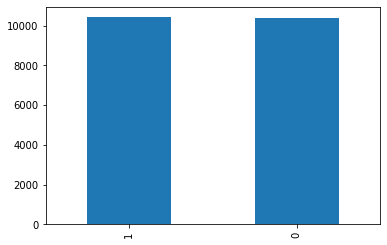

In [80]:
train['label'].value_counts().plot(kind = 'bar')

In [90]:
import itertools

In [91]:
import pickle